### The purpose of this notebook is to complete a data cleaning workflow from start to finish in order to validate the core functionality our package

#### TO DO:
- Add in complete PubChem data
- Write PubChem function
- Organize code modules & tests
- Clean up/finish writing tests
- Write main script wrapper function


In [1]:
# imports

from core import *
from cpd_info import *
from mol_sim_copy import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1
#### Generate dataframe of all current kegg enzymes from zipped text file

In [2]:
# create_kegg_df()

enzyme_df = create_kegg_df('../datasets/KEGG_enzyme_db_entries.gz', 'enzyme')
print(enzyme_df.shape)
enzyme_df.head()

(7524, 16)


,classname,cofactor,comment,dblinks,disease,effector,entry,genes,inhibitor,name,pathway,product,reaction,structures,substrate,sysname
0,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[A zinc protein. Acts on primary or secondary ...,"[(ExplorEnz - The Enzyme Database, [1.1.1.1]),...",[],[],1.1.1.1,"[(HSA, [124, 125, 126, 127, 128, 130, 131]), (...",[],"[alcohol dehydrogenase, aldehyde reductase, AD...","[(PATH, ec00010, Glycolysis / Gluconeogenesis)...","[aldehyde [CPD:C00071], NADH [CPD:C00004], H+ ...",[(1) a primary alcohol + NAD+ = an aldehyde + ...,[],"[primary alcohol [CPD:C00226], NAD+ [CPD:C0000...",[alcohol:NAD+ oxidoreductase]
1,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[A zinc protein. Some members of this group ox...,"[(ExplorEnz - The Enzyme Database, [1.1.1.2]),...",[],[],1.1.1.2,"[(HSA, [10327]), (PTR, [741418]), (PPS, [10099...",[],"[alcohol dehydrogenase (NADP+), aldehyde reduc...","[(PATH, ec00010, Glycolysis / Gluconeogenesis)...","[aldehyde [CPD:C00071], NADPH [CPD:C00005], H+...",[an alcohol + NADP+ = an aldehyde + NADPH + H+...,[],"[alcohol [CPD:C00069], NADP+ [CPD:C00006]]",[alcohol:NADP+ oxidoreductase]
2,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[The yeast enzyme acts most rapidly with NAD+;...,"[(ExplorEnz - The Enzyme Database, [1.1.1.3]),...",[],[],1.1.1.3,"[(NVE, [NEMVE_v1g225948]), (ATH, [AT1G31230, A...",[],"[homoserine dehydrogenase, HSDH, HSD]","[(PATH, ec00260, Glycine, serine and threonine...","[L-aspartate 4-semialdehyde [CPD:C00441], NADH...",[L-homoserine + NAD(P)+ = L-aspartate 4-semial...,[],"[L-homoserine [CPD:C00263], NAD+ [CPD:C00003],...",[L-homoserine:NAD(P)+ oxidoreductase]
3,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[Also converts diacetyl into acetoin with NADH...,"[(ExplorEnz - The Enzyme Database, [1.1.1.4]),...",[],[],1.1.1.4,"[(SCE, [YAL060W, YAL061W]), (KLA, [KLLA0_F0050...",[],"[(R,R)-butanediol dehydrogenase, butyleneglyco...","[(PATH, ec00650, Butanoate metabolism)]","[(R)-acetoin [CPD:C00810], NADH [CPD:C00004], ...","[(R,R)-butane-2,3-diol + NAD+ = (R)-acetoin + ...",[],"[(R,R)-butane-2,3-diol [CPD:C03044], NAD+ [CPD...","[(R,R)-butane-2,3-diol:NAD+ oxidoreductase]"
4,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[Transferred entry: acetoin dehydrogenase. Now...,[],[],[],1.1.1.5,[],[],[Transferred to 1.1.1.303 and 1.1.1.304],[],[],[],[],[],[]


## Step 2
#### Down select promiscuous enzymes from master enzyme dataframe

In [3]:
# select_promiscuous_enzymes()

prom_df = select_promiscuous_enzymes(enzyme_df)
print(prom_df.shape)
prom_df.head()

(549, 4)


,entry,reaction,product,substrate
0,1.1.1.1,[(1) a primary alcohol + NAD+ = an aldehyde + ...,"[aldehyde [CPD:C00071], NADH [CPD:C00004], H+ ...","[primary alcohol [CPD:C00226], NAD+ [CPD:C0000..."
37,1.1.1.38,[(1) (S)-malate + NAD+ = pyruvate + CO2 + NADH...,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADH...","[(S)-malate [CPD:C00149], NAD+ [CPD:C00003], o..."
39,1.1.1.40,[(1) (S)-malate + NADP+ = pyruvate + CO2 + NAD...,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADP...","[(S)-malate [CPD:C00149], NADP+ [CPD:C00006], ..."
41,1.1.1.42,[isocitrate + NADP+ = 2-oxoglutarate + CO2 + N...,"[2-oxoglutarate [CPD:C00026], CO2 [CPD:C00011]...","[isocitrate [CPD:C00311], NADP+ [CPD:C00006], ..."
84,1.1.1.85,"[(2R,3S)-3-isopropylmalate + NAD+ = 4-methyl-2...","[4-methyl-2-oxopentanoate [CPD:C00233], CO2 [C...","[(2R,3S)-3-isopropylmalate [CPD:C04411], NAD+ ..."


## Step 3
#### Combine substrates and products to account for reversible reactions

In [4]:
# combine_substrates_products()
    
combo_df = combine_substrates_products(prom_df)
print(combo_df.shape)
combo_df.head()

(549, 2)


,entry,product
0,1.1.1.1,"[aldehyde [CPD:C00071], NADH [CPD:C00004], H+ ..."
1,1.1.1.38,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADH..."
2,1.1.1.40,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADP..."
3,1.1.1.42,"[2-oxoglutarate [CPD:C00026], CO2 [CPD:C00011]..."
4,1.1.1.85,"[4-methyl-2-oxopentanoate [CPD:C00233], CO2 [C..."


## Step 4

#### Expand dataframe so that each row is a unique enzyme-product pair
There are multiple compounds in the 'product' field of the dataframe. This function parses each of those, and for each provides a new enzyme-product pair.

In [5]:
# explode_dataframe()

exploded_df = explode_dataframe(combo_df, parse_compound_ids, 'product', ['entry'])
print(exploded_df.shape)
exploded_df.head()

(3697, 2)


,entry,product
0,1.1.1.1,C00071
1,1.1.1.1,C00004
2,1.1.1.1,C00080
3,1.1.1.1,C01450
4,1.1.1.1,C00226


## Step 5
#### Remove cofactors from dataframe
We have curated a list of 37 common cofactors and reactant molecules that participate in reactions, but are not products that we care to train our model on. These steps removes cofactor data from our master dataset.

In [6]:
# remove_cofactors()

cofactors_df = pd.read_csv('../datasets/cofactor_list.csv')
clean_df = remove_cofactors(exploded_df, 'product', cofactors_df, 'CPD')
print(clean_df.shape)
clean_df.head()

(2144, 2)


,entry,product
0,1.1.1.1,C00071
3,1.1.1.1,C01450
4,1.1.1.1,C00226
6,1.1.1.1,C01612
7,1.1.1.38,C00022


## Step 6
#### Curate negative dataset
So far our curated dataset includes only examples of enzyme-product pairs that are known to react. In order to train our model, we need to include negative examples of enzyme-product pairs not expected to react. This function artifically pairs enzymes and products that are not known to react, and selects a subsample of these negative pairs to include in the master dataset

In [7]:
# create_negative_matches()

pos_df, neg_df = create_negative_matches(clean_df, 'entry', 'product')
neg_df = neg_df.sample(frac=0.01)

# negative data

print(neg_df.shape)
neg_df.head()

(7111, 3)


,enzyme,product,reacts
304330,1.14.19.34,C00679,0.0
219022,2.4.1.226,C00318,0.0
367924,4.2.1.104,C03582,0.0
292823,3.1.6.20,C05379,0.0
610915,2.3.1.261,C00178,0.0


In [8]:
# positive data

print(pos_df.shape)
pos_df.head()

(2144, 3)


,enzyme,product,reacts
0,1.14.14.159,C22010,1.0
1,1.14.14.159,C22009,1.0
2,1.14.14.159,C03161,1.0
3,1.14.14.159,C22008,1.0
4,1.14.14.159,C03024,1.0


## Step 7
#### Get SMILES strings for each product from the PubChem database
The RDKit chemistry package requires SMILES strings as an input. The Kegg database does not store SMILES strings for compounds. This step joins a previously curated dataset of SMILES strings into our master dataset

In [9]:
# read in smiles data

smiles_df = pd.read_csv('../datasets/df_cleaned_kegg_with_smiles.csv')
smiles_df = smiles_df.drop_duplicates(subset='SMILES')
print(smiles_df.shape)
smiles_df.head()

(1151, 6)


,Unnamed: 0,entry,KEGG,PubChem,CID,SMILES
0,0,1.1.1.1,C00071,3371,none,none
4,5,1.1.1.110,C03964,6685,440177,C1=CC(=CC=C1C[C@H](C(=O)O)O)O
5,7,1.1.1.110,C00331,3625,803,C1=CC=C2C(=C1)C(=CN2)CC(=O)C(=O)O
6,8,1.1.1.110,C01179,4406,979,C1=CC(=CC=C1CC(=O)C(=O)O)O
7,11,1.1.1.110,C05607,7930,643327,C1=CC=C(C=C1)C[C@H](C(=O)O)O


In [10]:
# add SMILES strings to positive data

pos_df = pd.merge(pos_df, smiles_df, how='inner', left_on='product', right_on='KEGG')
pos_df = pos_df.drop(columns=['Unnamed: 0', 'KEGG', 'CID', 'entry'])
pos_df = pos_df[pos_df['SMILES'] != 'none']
pos_df = pos_df.reset_index(drop=True)
print(pos_df.shape)
pos_df.head()

(1707, 5)


,enzyme,product,reacts,PubChem,SMILES
0,3.1.3.91,C03998,1.0,6711,CN1C=[N+](C2=C1C(=O)NC(=N2)N)[C@H]3[C@@H]([C@@...
1,3.1.3.91,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...
2,3.5.4.5,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...
3,3.1.3.91,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...
4,2.7.8.38,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...


In [11]:
# add SMILES strings to negative data

neg_df = pd.merge(neg_df, smiles_df, how='inner', left_on='product', right_on='KEGG')
neg_df = neg_df.drop(columns=['Unnamed: 0', 'KEGG', 'CID', 'entry'])
neg_df = neg_df[neg_df['SMILES'] != 'none']
neg_df = neg_df.reset_index(drop=True)
print(neg_df.shape)
neg_df.head()

(5984, 5)


,enzyme,product,reacts,PubChem,SMILES
0,1.14.19.34,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
1,2.1.1.325,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
2,2.5.1.17,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
3,4.2.1.159,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
4,3.5.3.21,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O


## Step 8

#### Pre-process negative and positive datasets to remove rows with only 1 enzyme
Positive and negative data must be processed separately, as the average molecular distances will be calculated separately for each dataset

In [12]:
# remove_single_cpd_rows()
# positive data

pos_master_df = remove_single_cpd_rows(pos_df, 'enzyme', 'SMILES')
pos_master_df = pos_master_df.reset_index(drop=True)
print(pos_master_df.shape)
pos_master_df.head()

(1660, 5)


,entry,product,reacts,PubChem,SMILES
0,3.1.3.91,C03998,1.0,6711,CN1C=[N+](C2=C1C(=O)NC(=N2)N)[C@H]3[C@@H]([C@@...
1,3.1.3.91,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...
2,3.5.4.5,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...
3,3.1.3.91,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...
4,2.7.8.38,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...


In [13]:
# negative data

neg_master_df = remove_single_cpd_rows(neg_df, 'enzyme', 'SMILES')
neg_master_df = neg_master_df.reset_index(drop=True)
print(neg_master_df.shape)
neg_master_df.head()

(5984, 5)


,entry,product,reacts,PubChem,SMILES
0,1.14.19.34,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
1,2.1.1.325,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
2,2.5.1.17,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
3,4.2.1.159,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O
4,3.5.3.21,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O


## Step 9
#### Calculate molecular distances between products of the same enzyme
Positive and negative data must be calculated separately because the calculated molecular distance is an average of the distances between all products of any one enzyme. The model is based on the fact that we expect these distances to be closer for reactive enzyme-product pairs than for non-reactive enzyme-product pairs

In [14]:
# calculate_dist()
# positive data

pos_dist_df = calculate_dist(pos_master_df)
print(pos_dist_df.shape)
pos_dist_df.head()

(1660, 8)


,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist
0,3.1.3.91,C03998,1.0,6711,CN1C=[N+](C2=C1C(=O)NC(=N2)N)[C@H]3[C@@H]([C@@...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",0.683553
1,3.1.3.91,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553
2,3.5.4.5,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.786090
3,3.1.3.91,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553
4,2.7.8.38,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.444668


In [15]:
# negative data

neg_dist_df = calculate_dist(neg_master_df)
print(neg_dist_df.shape)
neg_dist_df.head()

(5984, 8)


,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist
0,1.14.19.34,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000229F55...,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.324401
1,2.1.1.325,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000229F55...,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.329659
2,2.5.1.17,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000229F55...,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.330324
3,4.2.1.159,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000229F55...,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.330734
4,3.5.3.21,C00679,0.0,3948,C([C@@H]([C@H](C(=O)O)O)O)C(=O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x00000229F55...,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.410812


In [16]:
# concatenate negative & positive data for further processing

combined_df = pd.concat((pos_dist_df, neg_dist_df), axis=0)
print(combined_df.shape)
combined_df.head()

(7644, 8)


,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist
0,3.1.3.91,C03998,1.0,6711,CN1C=[N+](C2=C1C(=O)NC(=N2)N)[C@H]3[C@@H]([C@@...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",0.683553
1,3.1.3.91,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553
2,3.5.4.5,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.786090
3,3.1.3.91,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553
4,2.7.8.38,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.444668


## Step 10
#### Get dummy variables to represent enzyme class
We expect that many enzyme properties could be predictive features for this model. Enzyme class should encapsulate many of these features at a high level.

In [17]:
# binarize_enzyme_class()

master_df = binarize_enzyme_class(combined_df, 'entry')
master_df_df = master_df.reset_index(drop=True)
print(master_df.shape)
master_df.head()

(7644, 15)


,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7
0,3.1.3.91,C03998,1.0,6711,CN1C=[N+](C2=C1C(=O)NC(=N2)N)[C@H]3[C@@H]([C@@...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",0.683553,0,0,1,0,0,0,0
1,3.1.3.91,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553,0,0,1,0,0,0,0
2,3.5.4.5,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.786090,0,0,1,0,0,0,0
3,3.1.3.91,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553,0,0,1,0,0,0,0
4,2.7.8.38,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.444668,0,1,0,0,0,0,0


## Step 11
#### Add in compound features with RDKit
This step uses the RDKit packages to generate descriptive features of the reaction product compounds

In [18]:
master_df = create_cpd_info(master_df)
print(master_df.shape)
master_df.head()

(7644, 24)


,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist,enzyme_class_1,enzyme_class_2,...,enzyme_class_7,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW
0,3.1.3.91,C03998,1.0,6711,CN1C=[N+](C2=C1C(=O)NC(=N2)N)[C@H]3[C@@H]([C@@...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",0.683553,0,0,...,0,11.0,17.0,8.0,5.0,1.0,0.0,0.0,6.5,378.258
1,3.1.3.91,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553,0,0,...,0,9.0,13.0,5.0,3.0,0.0,0.0,0.0,5.0,243.219
2,3.5.4.5,C00475,1.0,3758,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.786090,0,0,...,0,9.0,13.0,5.0,3.0,0.0,0.0,0.0,5.0,243.219
3,3.1.3.91,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.683553,0,0,...,0,9.0,14.0,8.0,3.0,1.0,0.0,0.0,5.0,323.198
4,2.7.8.38,C00055,1.0,3357,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,<rdkit.Chem.rdchem.Mol object at 0x00000229F57...,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.444668,0,1,...,0,9.0,14.0,8.0,3.0,1.0,0.0,0.0,5.0,323.198


In [19]:
# write master dataframe to csv

# master_df.to_csv('../datasets/MASTER_DF.csv', index=False)

## Out of curiosity:
#### Examine average molecular distance distributions for negative and positive data
On first glance, it appears that our hypothesis is correct in that the distributions of average molecular distances are qualitatively different between the positive and negative datasets

AttributeError: Unknown property figsize

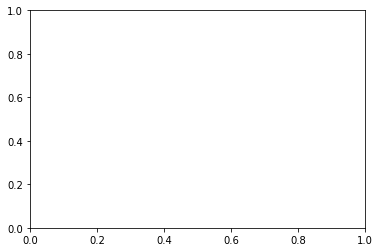

In [20]:
# look at distributions of distances for positive and negative data

#fig, axes = plt(1, 1, figsize=(9, 5))
fig, axes = plt.plot(1, 1, figsize=(9, 5))

pos = sns.distplot(pos_dist_df['dist'], bins=90, kde=True, norm_hist=True, ax=axes[0], color= 'red')
axes[0].set_title('Avg. Tanimoto Similarity to Positive Prediction Products')

neg = sns.distplot(neg_dist_df['dist'], bins=30, kde=True, norm_hist=False, ax=axes[0])
axes[0].set_title('Avg. Tanimoto Similarity to Negative Prediction Products')

for axis in axes:
    axis.set_xlim([0.0, 1.0])
    
fig.savefig('output')

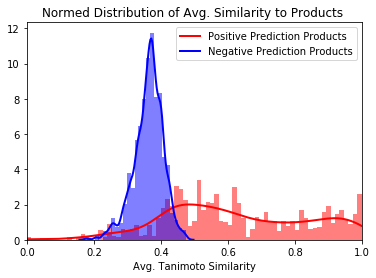

In [21]:
# look at distributions of distances for positive and negative data
pos_dist = pd.Series(pos_dist_df['dist'], name="Avg. Tanimoto Similarity")
neg_dist = pd.Series(neg_dist_df['dist'], name="Avg. Tanimoto Similarity")

fig = sns.distplot(pos_dist, bins=75, kde=True,
                   kde_kws={"color": "r", "lw": 2, "label": "Positive Prediction Products"},
                   hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 0.5, "color": "r"})

fig.set_xlim([0.0, 1.0])
sns.distplot(neg_dist, bins=25, kde=True,
                   kde_kws={"color": "b", "lw": 2, "label": "Negative Prediction Products"},
                   hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 0.5, "color": "b"})
fig.set_title('Normed Distribution of Avg. Similarity to Products ')
plt.savefig('output')

In [ ]:
fig.savefig

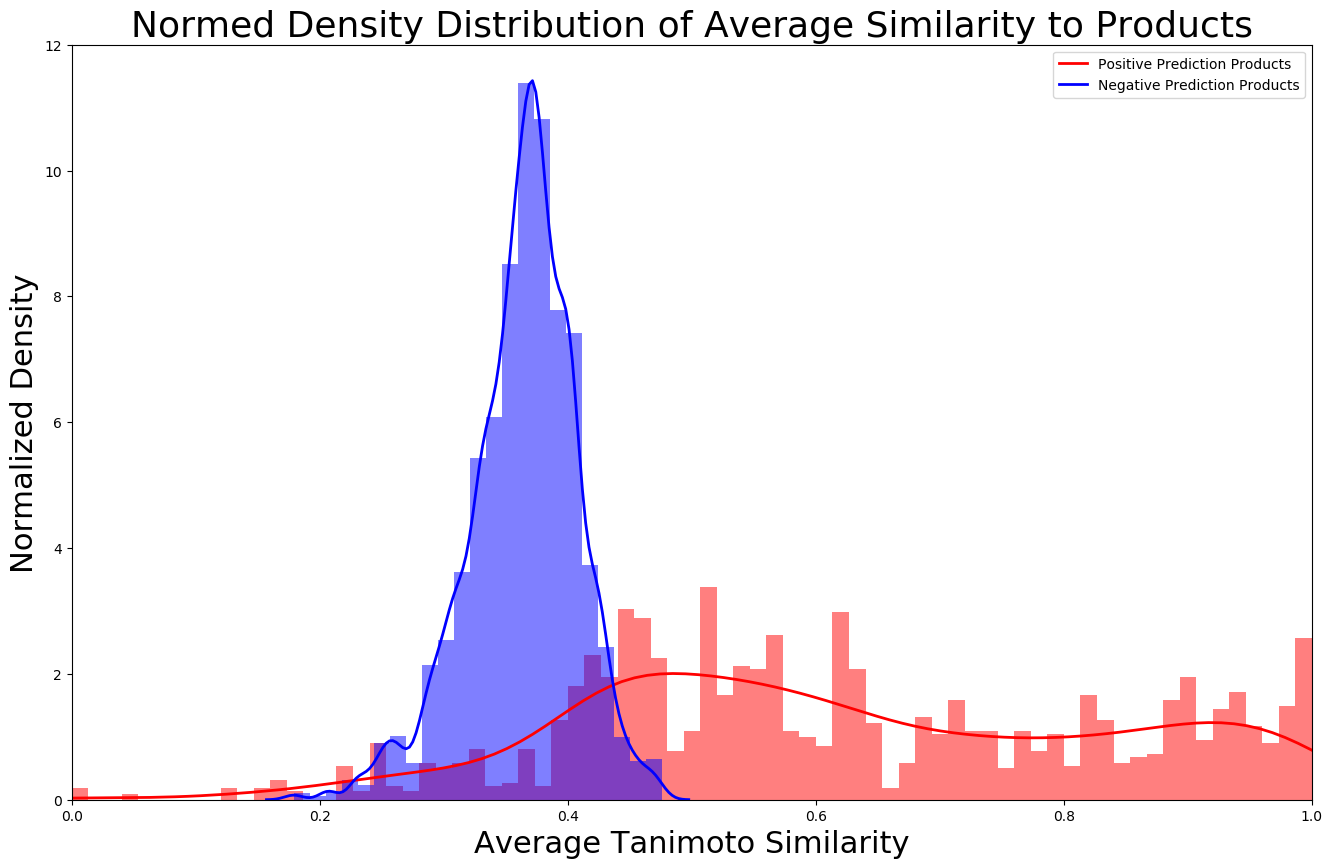

In [38]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 100)
sns.distplot(pos_dist, ax=ax, bins=75, kde=True,
                   kde_kws={"color": "r", "lw": 2, "label": "Positive Prediction Products"},
                   hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 0.5, "color": "r"})
ax.set_xlim([0.0, 1.0])
sns.distplot(neg_dist, ax=ax, bins=23, kde=True,
                   kde_kws={"color": "b", "lw": 2, "label": "Negative Prediction Products"},
                   hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 0.5, "color": "b"})
ax.set_title('Normed Density Distribution of Average Similarity to Products', fontsize=26)
ax.set_xlabel('Average Tanimoto Similarity', fontsize=22)
ax.set_ylabel('Normalized Density', fontsize=22)
fig.savefig('output')